In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("mobile_clean.csv")

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
import pandas as pd
import re

def extract_ram(text):
    if pd.isna(text):
        return None
    patterns = [
        r'(\d+)\s*GB\s*RAM',  
        r'(\d+)\s*GB.*RAM',   
        r'RAM\s*(\d+)\s*GB', 
        r'(\d+)\s*GB.*,\s*(\d+)\s*GB\s*RAM', 
        r'(\d+)\s*GB.*\s*RAM', 
        r'(\d+)\s*GB',        
    ]
    
    text = str(text).upper() 
    
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            if isinstance(matches[0], tuple):
                ram_value = matches[0][0]
            else:
                ram_value = matches[0]
            return int(ram_value)
    
    return None

df['RAM_GB'] = df['Name'].apply(extract_ram)


In [5]:
import random
df['RAM_GB']=df['RAM_GB'].fillna(1.0)

In [6]:
df['RAM_GB'] = np.where(df['Brand'] == 'Apple', 8.0, df['RAM_GB'])

In [7]:
import numpy as np
df['RAM_GB'] = np.where((df['Brand'] == 'IQOO') & (df['RAM_GB'] > 16), 4.0, df['RAM_GB'])

In [8]:
df.isnull().sum()

Brand      0
Name       0
Ratings    0
Reviews    0
Source     0
Price      0
RAM_GB     0
dtype: int64

In [9]:
df['RAM_GB'] = np.where((df['Brand'] == 'Lava') & (df['RAM_GB'] > 16), 6.0, df['RAM_GB'])
df['RAM_GB'] = np.where((df['Brand'] == 'POCO') & (df['RAM_GB'] > 16), 8.0, df['RAM_GB'])
df['RAM_GB'] = np.where((df['Brand'] == 'REDMI') & (df['RAM_GB'] > 16), 8.0, df['RAM_GB'])

In [10]:
df.head()

,Brand,Name,Ratings,Reviews,Source,Price,RAM_GB
0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499,4.0
1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999,6.0
2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999,1.0
3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999,8.0
4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586,4.0


In [11]:
df.to_csv('mobile_EDA.csv')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

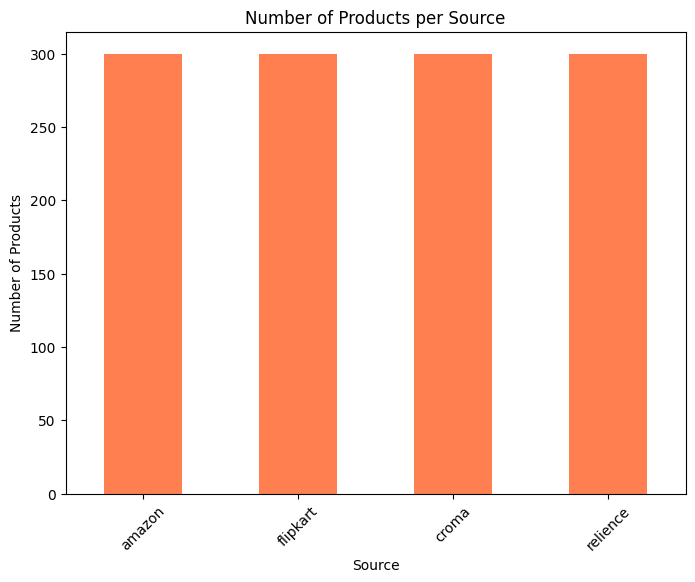

In [13]:
plt.figure(figsize=(8,6))
df['Source'].value_counts().plot(kind='bar', color='coral')
plt.title("Number of Products per Source")
plt.xlabel("Source")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

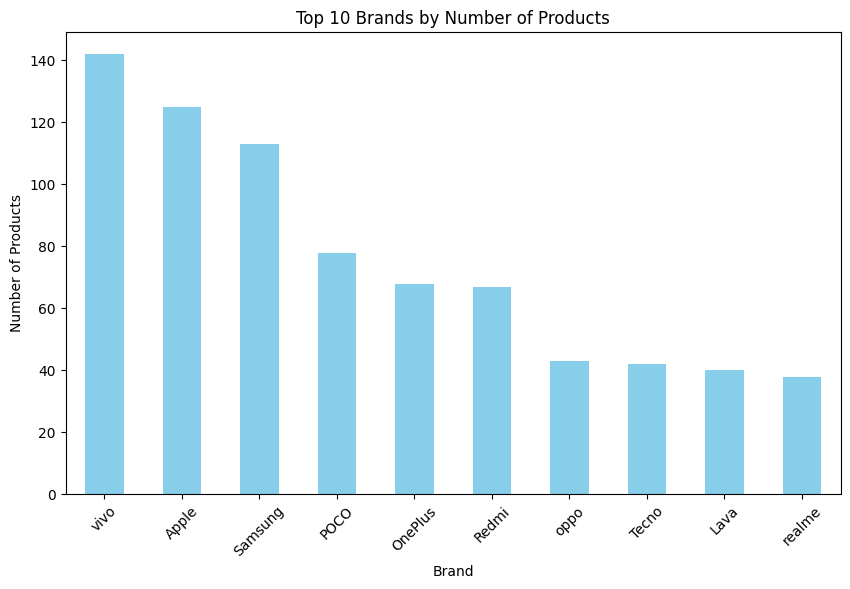

In [14]:
plt.figure(figsize=(10,6))
df['Brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

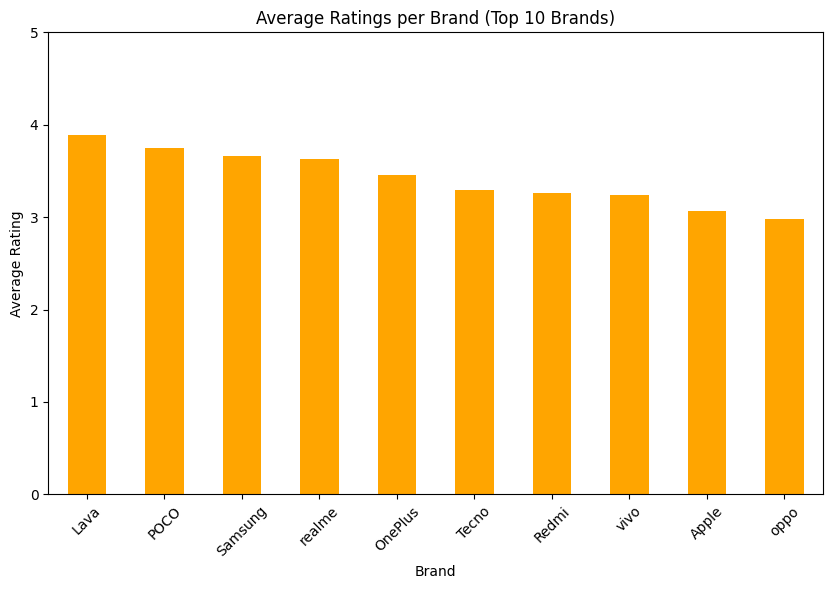

In [15]:
top_brands = df['Brand'].value_counts().head(10).index
avg_ratings = df[df['Brand'].isin(top_brands)].groupby('Brand')['Ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar', color='orange')
plt.title("Average Ratings per Brand (Top 10 Brands)")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()


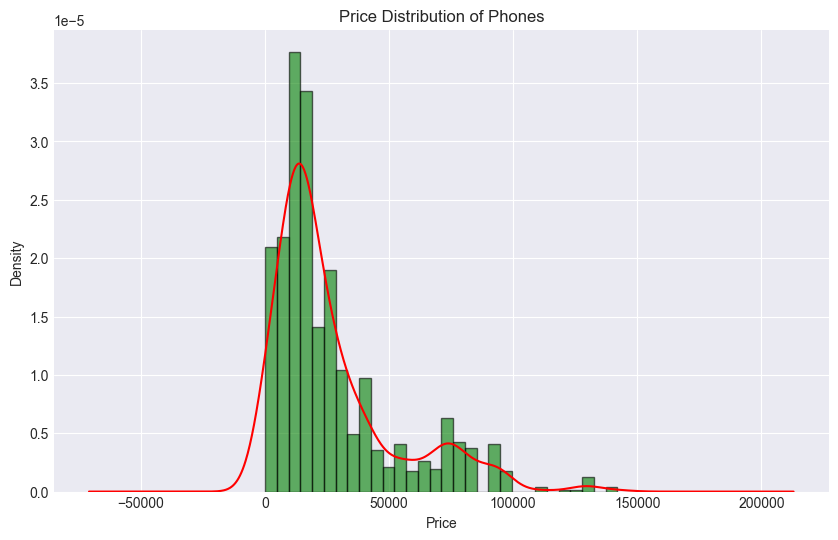

In [44]:
plt.figure(figsize=(10,6))
df['Price'].plot(kind='hist', bins=30, alpha=0.6, color='green', edgecolor='black', density=True)
df['Price'].plot(kind='kde', color='red')
plt.title("Price Distribution of Phones")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

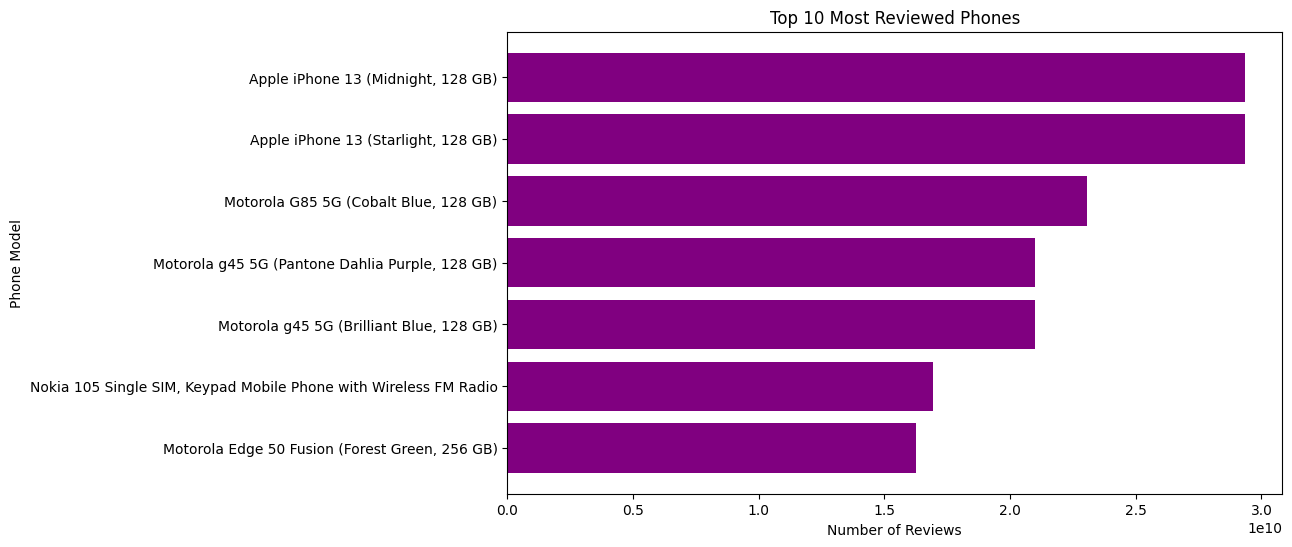

In [17]:
top_reviewed = df[['Name','Reviews']].sort_values(by='Reviews', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_reviewed['Name'], top_reviewed['Reviews'], color='purple')
plt.title("Top 10 Most Reviewed Phones")
plt.xlabel("Number of Reviews")
plt.ylabel("Phone Model")
plt.gca().invert_yaxis()
plt.show()

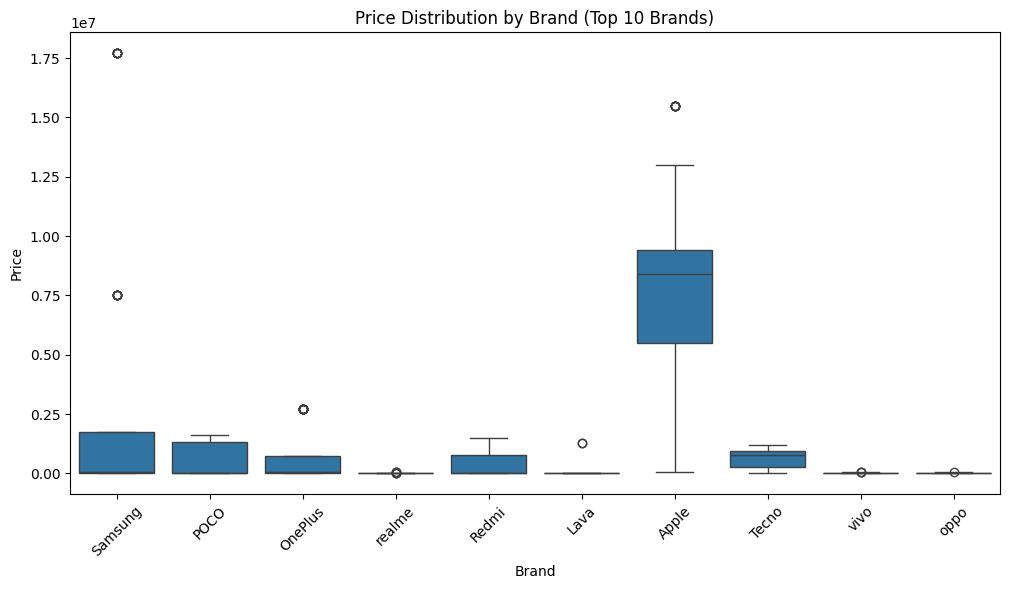

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Price')
plt.title("Price Distribution by Brand (Top 10 Brands)")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

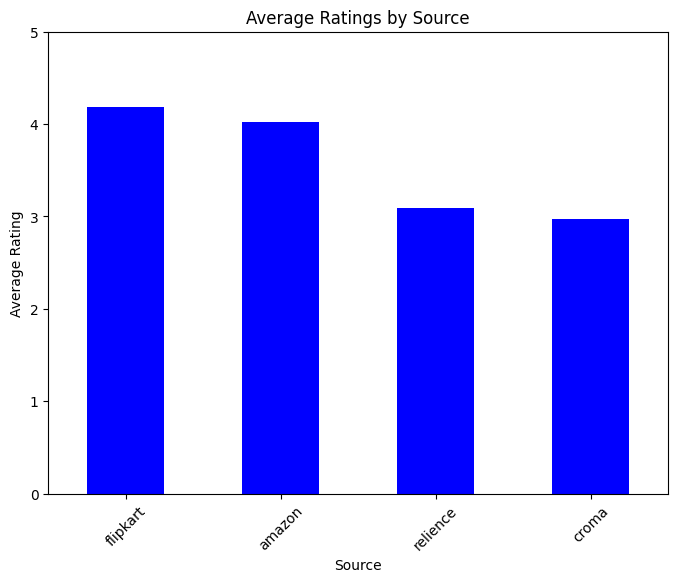

In [19]:
avg_source = df.groupby("Source")["Ratings"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
avg_source.plot(kind='bar', color='blue')
plt.title("Average Ratings by Source")
plt.xlabel("Source")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()


In [20]:
df.head()

,Brand,Name,Ratings,Reviews,Source,Price,RAM_GB
0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499,4.0
1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999,6.0
2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999,1.0
3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999,8.0
4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586,4.0


In [21]:
df['RAM_GB'] = df['RAM_GB'].apply(lambda x: np.random.choice([6.0, 8.0,16.0]) if x > 24 else x)

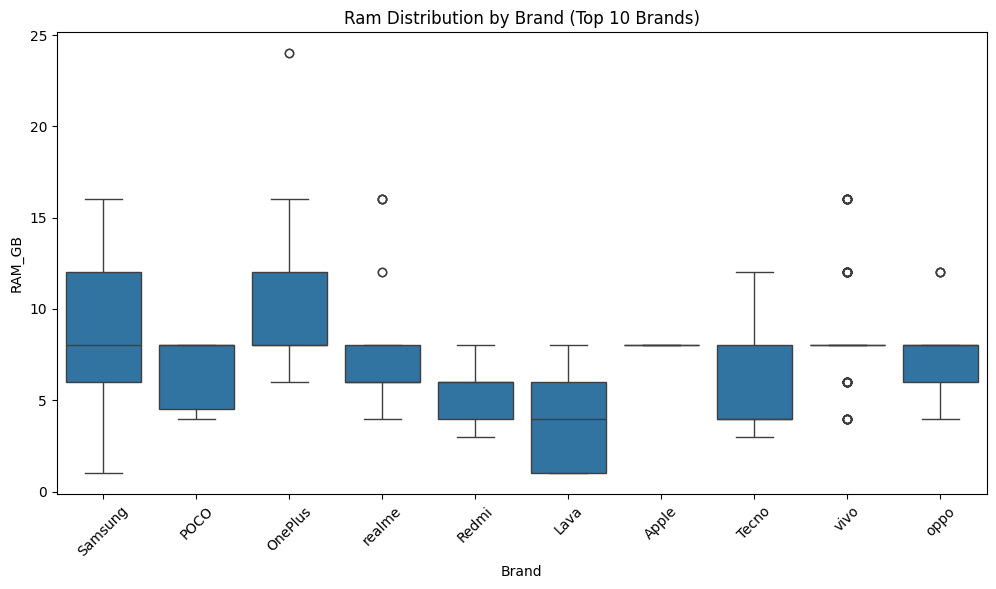

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='RAM_GB')
plt.title("Ram Distribution by Brand (Top 10 Brands)")
plt.xlabel("Brand")
plt.ylabel("RAM_GB")
plt.xticks(rotation=45)
plt.show()

C:\Users\Saranya\AppData\Local\Temp\ipykernel_11536\1394231467.py:47: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


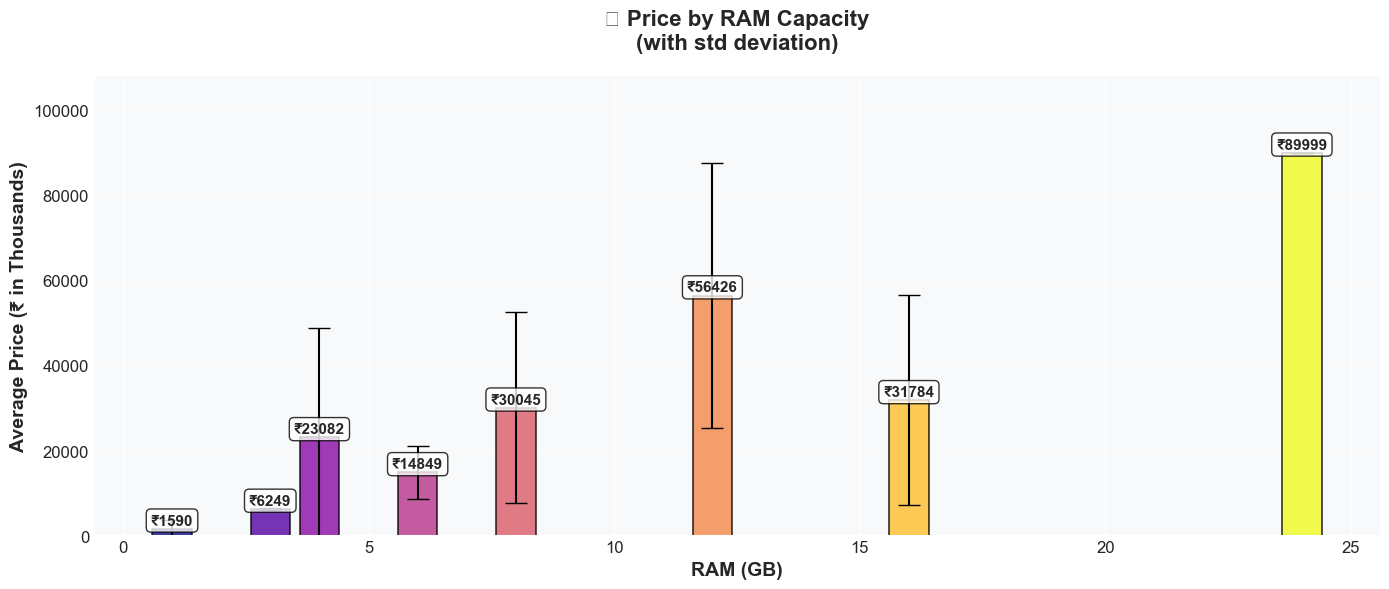

📊 RAM vs Price Analysis:
----------------------------------------
RAM 1GB: Avg Price ₹1590, Std Dev ₹2145
RAM 3GB: Avg Price ₹6249, Std Dev ₹334
RAM 4GB: Avg Price ₹23082, Std Dev ₹25698
RAM 6GB: Avg Price ₹14849, Std Dev ₹6153
RAM 8GB: Avg Price ₹30045, Std Dev ₹22429
RAM 12GB: Avg Price ₹56426, Std Dev ₹31127
RAM 16GB: Avg Price ₹31784, Std Dev ₹24691
RAM 24GB: Avg Price ₹89999, Std Dev ₹0


In [42]:
fig, ax = plt.subplots(figsize=(14, 6))

# Other size options you can try:
# fig, ax = plt.subplots(figsize=(10, 6))   # Smaller overall
# fig, ax = plt.subplots(figsize=(16, 8))   # Larger overall
# fig, ax = plt.subplots(figsize=(12, 5))   # Wide and short
# fig, ax = plt.subplots(figsize=(10, 8))   # More square-like

# Calculate statistics by RAM
ram_stats = df.groupby('RAM_GB')['Price'].agg(['mean', 'std']).reset_index()

# Create bar chart with error bars
bars = ax.bar(ram_stats['RAM_GB'], ram_stats['mean'], 
              yerr=ram_stats['std'], capsize=8, 
              color=plt.cm.plasma(np.linspace(0, 1, len(ram_stats))),
              alpha=0.8, edgecolor='black', linewidth=1.2, width=0.8)

# Customize the plot
ax.set_xlabel('RAM (GB)', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Price (₹ in Thousands)', fontsize=14, fontweight='bold')
ax.set_title('💰 Price by RAM Capacity\n(with std deviation)', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean_val in zip(bars, ram_stats['mean']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 300,
             f'₹{int(mean_val)}', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Set y-axis to show values in a better range
ax.set_ylim(0, max(ram_stats['mean'] + ram_stats['std']) * 1.2)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add some styling to make it more visually appealing
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add background color
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Print some insights
print("📊 RAM vs Price Analysis:")
print("-" * 40)
for _, row in ram_stats.iterrows():
    print(f"RAM {int(row['RAM_GB'])}GB: Avg Price ₹{int(row['mean'])}, Std Dev ₹{int(row['std'])}")

In [43]:
df.to_csv("mobile_clean.csv",index=False)